# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this entire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to simulate what you will face when you are out in the wild. 

Happy Coding!

In [ ]:
!pip install matplotlib

In [ ]:
!pip install pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
air_bnb = pd.read_csv('./AB_NYC_2019.csv')
#air_bnb.head()


In [8]:
air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [17]:
# How many neighbourhood groups / which shows up the most
air_bnb.groupby('neighbourhood_group').count()

#There are 5 neighborhood groups (Bronx, Brooklyn, Manhattan, Queens, & Staten Island)
#Manhattan shows up the most, with 21,661 rentals

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


In [6]:
air_bnb.groupby('neighbourhood_group').count()['id'].sort_values(ascending=False)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: id, dtype: int64

In [19]:
# Are private rooms the most popular in Manhattan?
air_bnb.groupby(['neighbourhood_group', 'room_type']).count()

#Entire home/apartment are the most popular rental in Manhattan (13,199)

id   name  host_id  host_name  \
neighbourhood_group room_type                                           
Bronx               Entire home/apt    379    379      379        378   
                    Private room       652    652      652        652   
                    Shared room         60     59       60         60   
Brooklyn            Entire home/apt   9559   9558     9559       9554   
                    Private room     10132  10127    10132      10128   
                    Shared room        413    413      413        413   
Manhattan           Entire home/apt  13199  13193    13199      13196   
                    Private room      7982   7979     7982       7976   
                    Shared room        480    480      480        480   
Queens              Entire home/apt   2096   2096     2096       2096   
                    Private room      3372   3372     3372       3370   
                    Shared room        198    198      198        198   
Staten Island       Entire home/apt    176    176      176        176   
                    Private room       188    188      188        188   
                    Shared room          9      9        9          9   

                                     neighbourhood  latitude  longitude  \
neighbourhood_group room_type                                             
Bronx               Entire home/apt            379       379        379   
                    Private room               652       652        652   
                    Shared room                 60        60         60   
Brooklyn            Entire home/apt           9559      9559       9559   
                    Private room             10132     10132      10132   
                    Shared room                413       413        413   
Manhattan           Entire home/apt          13199     13199      13199   
                    Private room              7982      7982       7982   
                    Shared room                480       480        480   
Queens              Entire home/apt           2096      2096       2096   
                    Private room              3372      3372       3372   
                    Shared room                198       198        198   
Staten Island       Entire home/apt            176       176        176   
                    Private room               188       188        188   
                    Shared room                  9         9          9   

                                     price  minimum_nights  number_of_reviews  \
neighbourhood_group room_type                                                   
Bronx               Entire home/apt    379             379                379   
                    Private room       652             652                652   
                    Shared room         60              60                 60   
Brooklyn            Entire home/apt   9559            9559               9559   
                    Private room     10132           10132              10132   
                    Shared room        413             413                413   
Manhattan           Entire home/apt  13199           13199              13199   
                    Private room      7982            7982               7982   
                    Shared room        480             480                480   
Queens              Entire home/apt   2096            2096               2096   
                    Private room      3372            3372               3372   
                    Shared room        198             198                198   
Staten Island       Entire home/apt    176             176                176   
                    Private room       188             188                188   
                    Shared room          9               9                  9   

                                     last_review  reviews_per_month  \
neighbourhood_group room_type                                         
Br

In [7]:
manhattan_bnb = air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']
manhattan_bnb.groupby('room_type').count()['id'].sort_values(ascending=False)

room_type
Entire home/apt    13199
Private room        7982
Shared room          480
Name: id, dtype: int64

In [8]:
# Who are the top 10 busiest hosts based on number of reviews per month?

air_bnb.groupby(['host_id', 'host_name']).sum()['reviews_per_month'].nlargest(10)

host_id    host_name                     
219517861  Sonder (NYC)                      397.56
244361589  Row NYC                           111.72
232251881  Lakshmee                           80.63
26432133   Danielle                           68.02
137274917  David                              62.89
224414117  Gabriel                            59.10
156948703  Asad                               56.44
344035     Brooklyn&   Breakfast    -Len-     56.00
156684502  Nalicia                            54.38
37312959   Maya                               53.53
Name: reviews_per_month, dtype: float64

In [15]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart
#Manhattan has the highest average price: $196.88

avg_prices = air_bnb.groupby('neighbourhood_group').mean()['price'].nlargest()

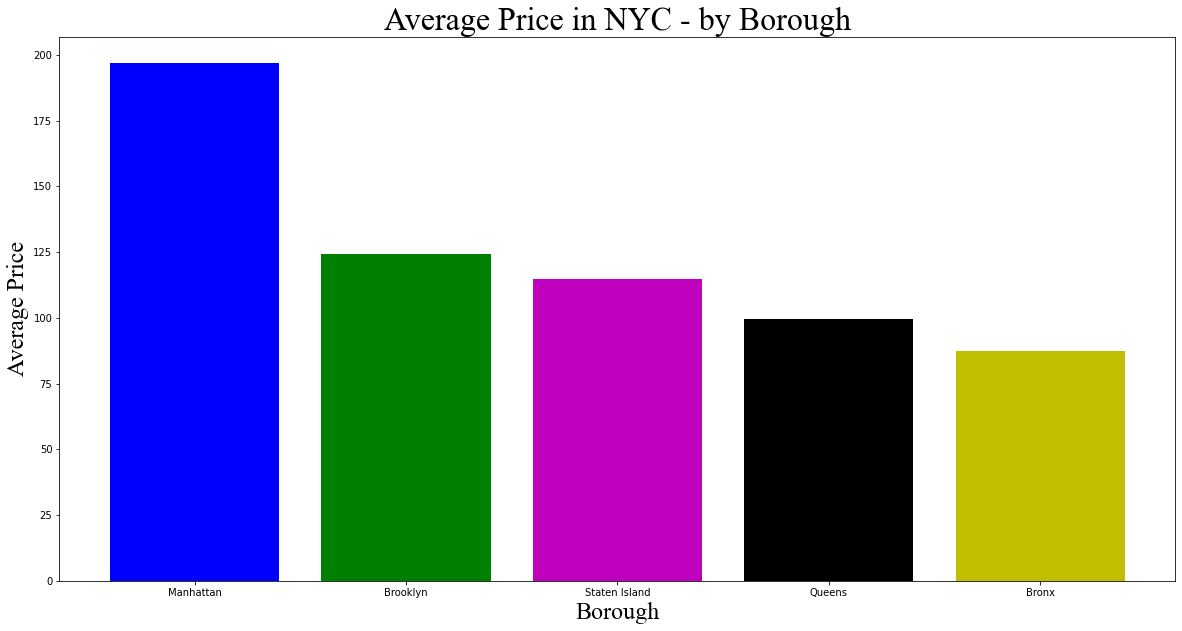

In [16]:

plt.figure(figsize=(20,10))
plt.bar(avg_prices.index, avg_prices, color=['b', 'g', 'm', 'k', 'y'])
plt.title('Average Price in NYC - by Borough', fontname='Times New Roman', fontsize=32)
plt.ylabel('Average Price', fontname='Times New Roman', fontsize=24)
plt.xlabel('Borough', fontname='Times New Roman', fontsize=24)
plt.show()

In [139]:
# What is the most expensive neighbourhood in each neighbourhood_group 'neighbourhood_group'
air_bnb.groupby(['neighbourhood_group', 'neighbourhood']).mean()[['price']]


price
neighbourhood_group neighbourhood            
Bronx               Allerton        87.595238
                    Baychester      75.428571
                    Belmont         77.125000
                    Bronxdale       57.105263
                    Castle Hill     63.000000
...                                       ...
Staten Island       Tottenville    144.857143
                    West Brighton   80.555556
                    Westerleigh     71.500000
                    Willowbrook    249.000000
                    Woodrow        700.000000

[221 rows x 1 columns]

In [17]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
#Jenny (host 271248669) has the highest minimal rental: $1170000

air_bnb['minimum_rental'] = air_bnb['minimum_nights'] * air_bnb['price']
air_bnb.nlargest(5, 'minimum_rental')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365,1170000
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,1000000
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83,989901
17811,13963005,Gorgeous 2 Bedroom apartment,41870118,Iveta,Queens,Forest Hills,40.72064,-73.83746,Entire home/apt,2350,365,0,NaN,NaN,1,364,857750
44429,34221161,Room with sofa bed or air mattress,9295237,Noelle,Queens,Astoria,40.75593,-73.91276,Private room,2000,365,0,NaN,NaN,2,0,730000


In [ ]:
#Who has no (zero) availability with a review count of 100 or more

air_bnb[(air_bnb['availability_365'] == 0) & (air_bnb['number_of_reviews'] >= 100)]

In [4]:
# If each host rents all of their properties for the night, which 5 make the most that night?
#Sonder (NYC) $82795; Blueground $70331; Michael $66,895; David $65,844; Alex $52,563
#air_bnb.info()
air_bnb.groupby(['host_id', 'host_name']).sum().nlargest(5, 'price')

,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,host_name,,,,,,,,,
219517861,Sonder (NYC),10885561678,13316.25823,-24198.18856,82795,4353,1281,397.56,106929,98588
107434423,Blueground,7210036953,9451.60418,-17166.13165,70331,7470,29,6.04,53824,58884
156158778,Sally,332529233,488.73929,-887.71735,37097,12,1,1.00,144,776
205031545,Red Awning,1415225676,1996.92821,-3624.34656,35294,750,127,21.21,2401,10796
30283594,Kara,1611854192,4931.41347,-8952.50779,33581,3767,65,3.94,14641,37924


In [6]:
# When did Danielle from Queens last receive a review?
air_bnb[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens')].sort_values('last_review')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
27021,21386105,Quiet & clean 1br haven with balcony near the ...,154256662,Danielle,Queens,Astoria,40.77134,-73.92424,Entire home/apt,250,3,1,2018-01-02,0.05,1,180
33861,26814763,One bedroom with full bed / 1 stop from Manhattan,201647469,Danielle,Queens,Long Island City,40.74565,-73.94699,Private room,108,2,13,2019-06-20,1.74,1,333
7086,5115372,Comfy Room Family Home LGA Airport NO CLEANING...,26432133,Danielle,Queens,East Elmhurst,40.76374,-73.87103,Private room,54,1,430,2019-07-03,13.45,5,347
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
22068,17754072,Bed in Family Home Near LGA Airport,26432133,Danielle,Queens,East Elmhurst,40.76389,-73.87155,Shared room,38,1,224,2019-07-06,7.96,5,80
21517,17222454,Sun Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76367,-73.87088,Private room,48,1,417,2019-07-07,14.36,5,338
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337
16349,13151075,ASTORIA APARTMENT OUTDOOR SPACE,18051286,Danielle,Queens,Astoria,40.77221,-73.92901,Private room,50,1,0,NaN,NaN,1,0


In [7]:
# bar chart showing the number of room types in the Bronx
bronx_bnb = air_bnb[air_bnb['neighbourhood_group'] == 'Bronx']
room_count = bronx_bnb.groupby('room_type').count()['id']
room_count



room_type
Entire home/apt    379
Private room       652
Shared room         60
Name: id, dtype: int64

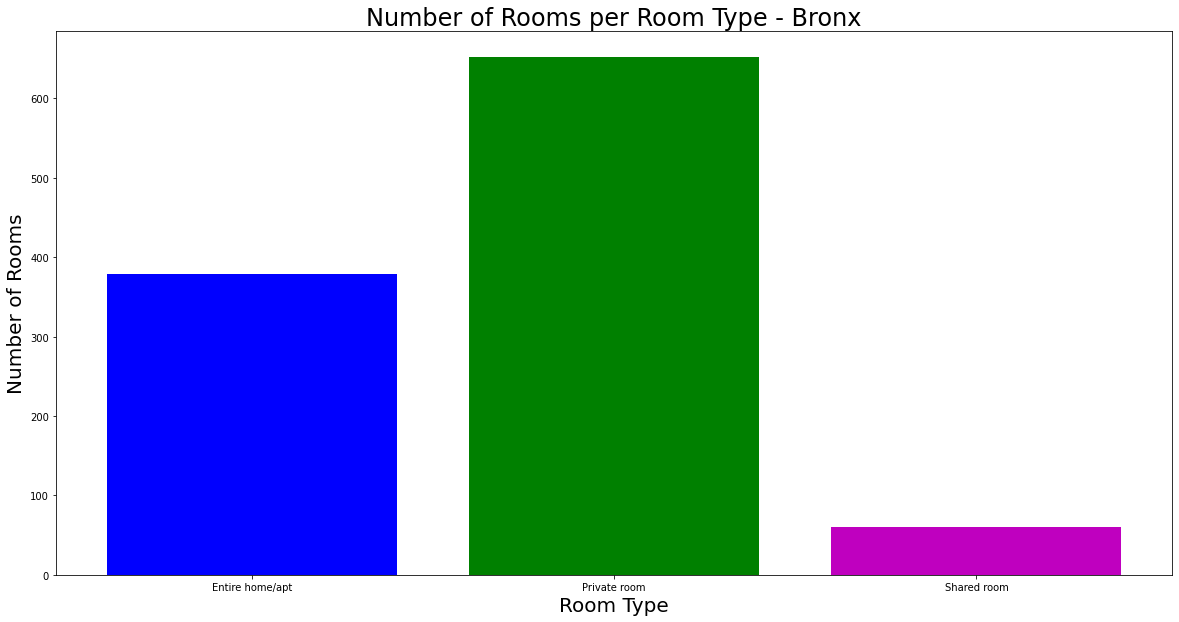

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(room_count.index, room_count, color=['b', 'g', 'm'])
plt.title('Number of Rooms per Room Type - Bronx', fontsize=24)
plt.xlabel('Room Type', fontsize=20)
plt.ylabel('Number of Rooms', fontsize=20)
plt.show()

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

In [ ]:
#Not surprising that Manhattan has the highest average rates for NYC rentals.
#It is also unsurprising that Manhattan and Brooklyn have the most rentals 
#out of all 5 boroughs; both are very popular with tourists and are relatively central locations.

#One surprising insight was the number of rentals with a high minimum-stay (several months)
#it is noteworthy that many of these were also located in Manhattan.
#While it might be speculation, I would guess those are rentals set aside for long-term
#rentals that fall short of a year-long lease/sublease. In a global city like New York, there
#would be a significant market for such offerings to meet the needs of buisness travelers. The concentration
#of financial and high-end amenities on Manhattan further solidifies my supposition. 
#though I cannot be more definitive without more information to analyze. 
